In [301]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score, precision_score
from sklearn.preprocessing import StandardScaler

In [239]:
df = pd.read_csv('/Users/anastasiafedoracenko/Desktop/athletes.csv')
df.head(10)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [241]:
df.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

Учитывая то, что дату рождения мы не сможем подставить, потому, что это не зависящий фактор, то этот пропуск проще удалить. 
На счет веса и роста: учитыая то, что в зависимости от гендера, вида спорта и известного роста/веса можно вычлинить рседнее и подставить ее, скорее всего, так и сделаю, но в случаях, если в одной строчке отсутствуют сразу оба значения, то вернее будет удалить эти значения, что б не косить данные. 

In [242]:
df = df[~(df['dob'].isna())]

In [243]:
print(df['sport'].value_counts())
print(df['sport'].mode()[0])

athletics            2363
aquatics             1445
football              611
rowing                547
cycling               525
hockey                432
judo                  392
shooting              390
volleyball            384
sailing               379
handball              363
wrestling             353
canoe                 331
gymnastics            324
rugby sevens          300
basketball            288
boxing                286
weightlifting         258
fencing               246
equestrian            222
tennis                196
badminton             172
table tennis          172
archery               128
taekwondo             128
golf                  120
triathlon             110
modern pentathlon      72
Name: sport, dtype: int64
athletics


In [244]:
print(df['height'].value_counts())
print(df['height'].mode()[0])

1.80    580
1.70    579
1.75    484
1.78    453
1.73    424
       ... 
1.34      1
2.17      1
1.42      1
1.40      1
2.14      1
Name: height, Length: 82, dtype: int64
1.8


In [245]:
print(df['weight'].value_counts())
print(df['weight'].mode()[0])

70.0     482
60.0     387
65.0     382
75.0     342
58.0     336
        ... 
36.0       1
165.0      1
31.0       1
163.0      1
33.0       1
Name: weight, Length: 123, dtype: int64
70.0


По выше указанным характеристикам можно увидеть, какие виды спорта встречаются чаще всего (athletics,  aquatics), по поводу роста все не однозначно, отрыв очень не велик у первых двух наиболее часто встречающихся замеров( разница в замерах 10см), в среднем, как и ситуация с весом. 

Думаю будет логично перевести гендер в бинарный вид, разделить данные по мужчинам и женщинам, вычленить оттуда вес  и рост в зависимости от вида спорта и гендера и тогда на пустые значения вставить моду или рандом от двух наиболее часто встречающихся показателей. НО только в случае, если отсутствует только один показатель(кстати говоря, строчки данных с отсутствием и веса, и роста можно сразу отсеить) 

In [246]:
df = df.drop(np.where(df['weight'] is None and df['height'] is None)[0])

In [247]:
df['sex'] = df['sex'].astype('category')
df['gender'] = df['sex'].cat.codes
df.head()

#перевели пол в бинарный вид

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,gender
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,1
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,1
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,1


In [248]:
d1 = df[df['gender'] == 1]
d0 = df[df['gender'] == 0]

Хочу вывести топ 2 по видам спорта (athletics, aquatics ) и смотреть по ним значения и зависимости, потому что с остальными будет сложнее из-за маленькой разницы в количестве спортсменов. 

In [249]:
print(d1['sport'].value_counts())
print(d1['sport'].mode()[0])

#проверила, что в топе спорта до сих пор остаются те же два вида

athletics            1226
aquatics              729
football              347
rowing                331
cycling               325
boxing                250
wrestling             239
shooting              239
judo                  239
canoe                 220
hockey                216
sailing               216
volleyball            192
handball              183
weightlifting         154
rugby sevens          152
basketball            144
equestrian            137
fencing               122
gymnastics            114
tennis                105
badminton              86
table tennis           86
taekwondo              64
archery                64
golf                   61
triathlon              55
modern pentathlon      36
Name: sport, dtype: int64
athletics


In [250]:
d1_filter = d1['sport'].isin(['athletics', 'aquatics']) 
d1[d1_filter].head(10)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,gender
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,1
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0,1
10,343694681,Abadi Hadis,ETH,male,11/6/97,1.70,63.0,athletics,0,0,0,1
11,591319906,Abbas Abubakar Abbas,BRN,male,5/17/96,1.75,66.0,athletics,0,0,0,1
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0,1
20,215053268,Abdalaati Iguider,MAR,male,3/25/87,1.73,57.0,athletics,0,0,0,1
21,763711985,Abdalelah Haroun,QAT,male,1/1/97,1.85,80.0,athletics,0,0,0,1
22,924593601,Abdalla Targan,SUD,male,9/28/96,1.77,65.0,athletics,0,0,0,1
24,890222258,Abdelati El Guesse,MAR,male,2/27/93,1.90,72.0,athletics,0,0,0,1


In [251]:
d1[d1_filter][['sport', 'height']].value_counts().head(10)

sport      height
athletics  1.80      73
           1.78      63
           1.83      63
           1.85      58
           1.75      57
           1.88      48
aquatics   1.85      46
athletics  1.90      45
aquatics   1.90      43
athletics  1.70      42
dtype: int64

Тут видим, что больше всего рябет в атлетике с ростом от 1.78 до 1.83, а в водных видах чащ всего встречаются спортсмены с ростом 1.85 и 1.90, так что думаю, что сможем подставить эти значения в некоторые пропуски.

In [252]:
d1[d1_filter][['sport', 'weight']].value_counts().head(20)

sport      weight
athletics  70.0      67
           65.0      46
           60.0      46
           74.0      42
           62.0      40
           72.0      40
aquatics   85.0      38
           75.0      37
athletics  80.0      36
           68.0      35
           64.0      35
           58.0      35
aquatics   80.0      35
athletics  78.0      34
aquatics   90.0      33
athletics  75.0      33
           63.0      32
aquatics   82.0      28
athletics  77.0      27
aquatics   77.0      26
dtype: int64

А теперь видим, что вес 70кг самый частый в атлетике, при этом в водных вида спорта самые частые веса = 85кг и 75 кг, хотя разница в кол-ве ребят с весом в 80кг всего пара человек, так что думаю что все эти три веса в топе. 

In [253]:
d0_filter = d0['sport'].isin(['athletics', 'aquatics']) 
d0[d0_filter]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,gender
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0,0
13,376068084,Abbey D'Agostino,USA,female,5/25/92,1.61,49.0,athletics,0,0,0,0
14,162792594,Abbey Weitzeil,USA,female,12/3/96,1.78,68.0,aquatics,1,1,0,0
64,884912136,Abigail Johnston,USA,female,11/16/89,1.66,61.0,aquatics,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11512,371106012,Zohar Shikler,ISR,female,7/8/97,1.78,61.0,aquatics,0,0,0,0
11525,999437858,Zsofia Erdelyi,HUN,female,12/10/87,1.64,53.0,athletics,0,0,0,0
11530,739315046,Zsuzsanna Jakabos,HUN,female,4/3/89,1.85,70.0,aquatics,0,0,0,0
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0,0


In [254]:
d0[d0_filter][['sport', 'height']].value_counts().head(10)

sport      height
athletics  1.70      91
           1.68      74
           1.65      65
           1.73      59
           1.75      51
aquatics   1.70      50
athletics  1.60      44
           1.78      43
           1.67      43
aquatics   1.73      43
dtype: int64

Тут видим, что больше всего женщин в атлетике с ростом от 1.68 до 1.70, а в водных видах спорта 1.70.

In [255]:
d0[d0_filter][['sport', 'weight']].value_counts().head(10)

sport      weight
athletics  58.0      71
           50.0      57
           55.0      56
aquatics   60.0      49
athletics  57.0      48
           52.0      48
           53.0      46
aquatics   62.0      45
athletics  54.0      44
           56.0      40
dtype: int64

В атлетике чаще всего встречаются спортсменки с весом 58кг, а в водных видах чаще всего 60кг. Думаю нам хватит этих данных что б подправить некоторые значения из основного фрейма данных. 

In [256]:

for row in df:
    if df['height'] is None and df['sport'] == 'athletics' and df['gender'] == 1 :
        df['height'].fillna( '1.80' , inplace = True)
    elif df['height'] is None and df['sport'] == 'aquatics' and df['gender'] == 1:
        df['height'].fillna( '1.85' , inplace = True)
    elif df['height'] is None and df['sport'] == 'athletics' and df['gender'] == 0:
        df['height'].fillna( '1.70' , inplace = True)
    elif df['height'] is None and df['sport'] == 'aquatics' and df['gender'] == 0:
        df['height'].fillna( '1.70' , inplace = True)
    elif df['weight'] is None and df['sport'] == 'athletics' and df['gender'] == 1 :
        df['weight'].fillna( '70' , inplace = True)
    elif df['weight'] is None and df['sport'] == 'aquatics' and df['gender'] == 1:
        df['weight'].fillna( '85' , inplace = True)
    elif df['weight'] is None and df['sport'] == 'athletics' and df['gender'] == 0:
        df['weight'].fillna( '58' , inplace = True)
    elif df['weight'] is None and df['sport'] == 'aquatics' and df['gender'] == 0:
        df['weight'].fillna( '60' , inplace = True)
        
df.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              0
height         329
weight         658
sport            0
gold             0
silver           0
bronze           0
gender           0
dtype: int64

Выше сложно читаемый код, но по каждому виду спорта и гендеру я попыталась подставить значения, но по условию ничего не подошло, а жаль. Придется просто чистить данные. 

In [257]:
df = df[~(df['weight'].isna())]
df = df[~(df['height'].isna())]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           10858 non-null  int64   
 1   name         10858 non-null  object  
 2   nationality  10858 non-null  object  
 3   sex          10858 non-null  category
 4   dob          10858 non-null  object  
 5   height       10858 non-null  float64 
 6   weight       10858 non-null  float64 
 7   sport        10858 non-null  object  
 8   gold         10858 non-null  int64   
 9   silver       10858 non-null  int64   
 10  bronze       10858 non-null  int64   
 11  gender       10858 non-null  int8    
dtypes: category(1), float64(2), int64(4), int8(1), object(4)
memory usage: 954.4+ KB


В итоге почистили все данные, немного изучив. Дальше делю их на test/train == 20/80 

In [258]:
s_columns = df[[ 'sport', 'gold', 'silver', 'bronze', 'height', 'weight']]
x = pd.get_dummies(s_columns, columns = [ 'sport'])
x

,gold,silver,bronze,height,weight,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,0,0,0,1.72,64.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1.68,56.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1.98,79.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.83,80.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1.81,71.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,0,0,0,1.64,58.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11534,0,0,0,1.73,63.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11535,0,0,0,1.85,100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11536,0,0,0,1.60,56.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [306]:
object= StandardScaler()
x = object.fit_transform(x) 

In [309]:
y = df['gender']
y

0        1
1        0
2        1
3        1
4        1
        ..
11533    0
11534    0
11535    1
11536    1
11537    1
Name: gender, Length: 10858, dtype: int8

In [310]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [311]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [312]:
predictions = model.predict_proba(x_test)

In [313]:
model.score(x_train, y_train)

0.816601427584619

In [314]:
model.score(x_test, y_test)

0.8098526703499079

Для построения ROC кривой нужно найти TPR, FPR, а для этого надо найти tp, fp, tn, fn. 

In [343]:
tp = 0 
fp = 0 
fn = 0 
tn = 0 

predictions = model.predict_proba( x_test )
for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [344]:
pred = model.predict(x_test)


tp, fp, fn, tn

(982, 207, 206, 777)

Проверяем точность 

In [345]:
(tp + tn) / (tp + fp + fn + tn)

0.8098526703499079

In [346]:
precision = tp / (tp + fp)
precision

0.8259041211101766

In [347]:
recall = tp / (tp + fn)
recall

0.8265993265993266

In [348]:
recall_score(y_test, pred)

0.8265993265993266

In [349]:
precision_score(y_test, pred)

0.8259041211101766

In [350]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [351]:
for line in zip( fpr[:20], tpr[:20], thres[:20] ):
    print( line )

(0.0, 0.0, 1.9999302776826782)
(0.0, 0.0008417508417508417, 0.9999302776826782)
(0.0, 0.03282828282828283, 0.9959395787374867)
(0.0010162601626016261, 0.03282828282828283, 0.9958189616639255)
(0.0010162601626016261, 0.04292929292929293, 0.994321369163105)
(0.0010162601626016261, 0.04461279461279461, 0.9940183688281812)
(0.0010162601626016261, 0.045454545454545456, 0.9937847173981972)
(0.0010162601626016261, 0.04713804713804714, 0.9934977850656844)
(0.0010162601626016261, 0.05134680134680135, 0.992830277639815)
(0.0010162601626016261, 0.05303030303030303, 0.992589854561995)
(0.0020325203252032522, 0.05303030303030303, 0.9925702180263252)
(0.0020325203252032522, 0.0707070707070707, 0.9891125411877457)
(0.003048780487804878, 0.0707070707070707, 0.9889351732537078)
(0.003048780487804878, 0.0765993265993266, 0.9882406450448568)
(0.0040650406504065045, 0.0765993265993266, 0.9881058513465758)
(0.0040650406504065045, 0.09764309764309764, 0.9847764697154774)
(0.00508130081300813, 0.097643097643

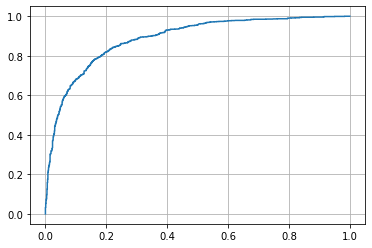

In [352]:
plt.plot( fpr, tpr )
plt.grid()

In [353]:
model2 = LogisticRegression()

In [354]:
model2.fit( x_train, y_train )

LogisticRegression()

In [355]:
predictions2 = model2.predict_proba( x_test )

In [356]:
roc_auc_score( y_test, predictions[:, 1] )

0.8870916139716953

In [357]:
roc_auc_score( y_test, predictions2[:, 1] )

0.8870916139716953

In [374]:
model2.fit(x_train, y_train)
tpr1 = []
fpr1 = []

for threshold in np.arange(0, 1, 0.01):
    tp1 = 0 
    fp1 = 0 
    fn1 = 0 
    tn1 = 0 
    predictions2 = model2.predict_proba( x_test )
    for predicted_prob, actual in zip( predictions2[:,1], y_test ):    
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0
        
        if predicted == 1:
            if actual == 1:
                tp1 += 1
            else:
                fp1 += 1
        
        else:
            if actual == 1:
                fn1 += 1
            else:
                tn1 += 1
                
    tpr1.append(tp1 / (tp1 + fn1))
    fpr1.append(fp1 / (fp1 + tn1))


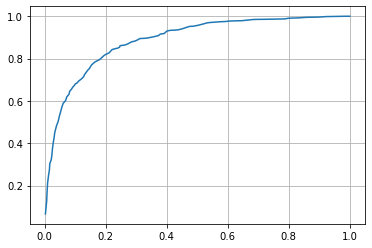

In [375]:
plt.plot( fpr1, tpr1 )
plt.grid()

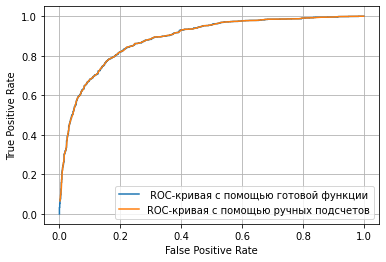

In [376]:
plt.plot( fpr, tpr, label = ' ROC-кривая с помощью готовой функции' )
plt.plot( fpr1, tpr1, label = 'ROC-кривая с помощью ручных подсчетов' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.grid()
plt.show()

Кривые почти одинаковые, в функции с ручным посчетом меньше ступеней, она более прямая. 

In [377]:
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )

In [378]:
pr.shape, thres.shape

((2005,), (2004,))

In [379]:
for line in zip( pr[:20], re[:20], thres[:20] ):
    print( line )

(0.5510204081632653, 1.0, 0.011008796223264701)
(0.5508120649651972, 0.9991582491582491, 0.01106667469604644)
(0.5510677808727948, 0.9991582491582491, 0.011359185632517636)
(0.5513237343241988, 0.9991582491582491, 0.011592226084398914)
(0.5515799256505576, 0.9991582491582491, 0.011680720512635766)
(0.5518363551836355, 0.9991582491582491, 0.013015182907203224)
(0.552093023255814, 0.9991582491582491, 0.013065168045396085)
(0.552349930200093, 0.9991582491582491, 0.013663981566429026)
(0.5526070763500931, 0.9991582491582491, 0.01372459491093897)
(0.5531220876048463, 0.9991582491582491, 0.013978691173569969)
(0.5533799533799534, 0.9991582491582491, 0.014028927886448139)
(0.5536380597014925, 0.9991582491582491, 0.014219961295134935)
(0.5538964069062062, 0.9991582491582491, 0.014266599447804486)
(0.554154995331466, 0.9991582491582491, 0.014363014064546235)
(0.5544138253152733, 0.9991582491582491, 0.014783229529895)
(0.5546728971962617, 0.9991582491582491, 0.014983019098538738)
(0.554932211313

(0.0, 1.0)

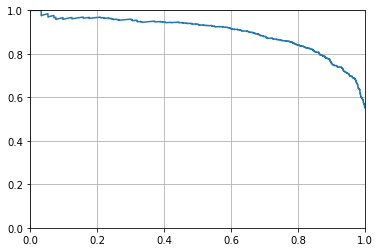

In [380]:
plt.plot(re, pr)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)

Осталось только объеденить все три графика 

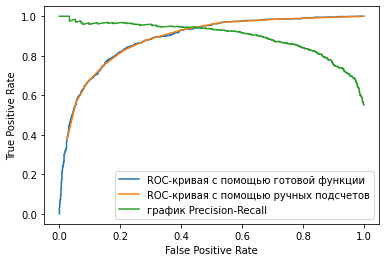

In [338]:
plt.plot( fpr, tpr, label = 'ROC-кривая с помощью готовой функции' )
plt.plot( fpr1, tpr1, label = 'ROC-кривая с помощью ручных подсчетов' )
plt.plot( re, pr, label = 'график Precision-Recall' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()